In [22]:
import scipy.io as sio
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
import sys
import h5py

In [23]:
#ninapro 데이터셋 불러오기
ninapro_df = pd.DataFrame()
for i in range (1,11):
    adress = f"ninapro_db5/s{i}/S{i}_E2_A1"
    filename = adress
    mat = sio.loadmat(filename)
    emg = mat['emg']
    Restimulus = mat['restimulus']
    rerepetition = mat['rerepetition']
    df_emg = pd.DataFrame(emg)
    df_Restimulus = pd.DataFrame(Restimulus)
#    df_rerepetition = pd.DataFrame(rerepetition)
    df = pd.concat([df_emg, df_Restimulus], axis=1)
#    df = pd.concat([df, df_rerepetition], axis=1)
#    df.columns = ['emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7', 'emg8', 'emg9', 'emg10', 'emg11', 'emg12', 'emg13', 'emg14', 'emg15', 'emg16', 'Restimulus', 'rerepetition']
    df.columns = ['emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7', 'emg8', 'emg9', 'emg10', 'emg11', 'emg12', 'emg13', 'emg14', 'emg15', 'emg16', 'Restimulus']
    ninapro_df5 = pd.concat([ninapro_df, df])

In [24]:
import pandas as pd
import scipy.io as sio
import numpy as np

dfs = []
for i in range(1, 21):
    address = f"ninapro_db2/DB2_s{i}/S{i}_E1_A1.mat"
    try:
        mat = sio.loadmat(address)
        
        emg = mat['emg'] 
        restimulus = mat['restimulus']
        
        n_samples, n_channels = emg.shape
        target_channels = 16
        
        if n_channels < target_channels:
            pad_width = target_channels - n_channels
            zeros = np.zeros((n_samples, pad_width))
            emg_padded = np.hstack([emg, zeros])
        else:
            emg_padded = emg[:, :target_channels]
            

        col_names = [f'emg{k}' for k in range(1, target_channels + 1)]
        df_emg = pd.DataFrame(emg_padded, columns=col_names)
        df_restimulus = pd.DataFrame(restimulus, columns=['Restimulus'])
        
        df_concat = pd.concat([df_emg, df_restimulus], axis=1)
        
        dfs.append(df_concat)
    
    except FileNotFoundError:
        print(f"파일을 찾을 수 없습니다: {address}")
    except Exception as e:
        print(f"Subject {i} 처리 중 에러 발생: {e}")

if dfs:
    ninapro_df2 = pd.concat(dfs, ignore_index=True)
    print("-" * 30)
    print("최종 병합 완료")
    print(f"전체 데이터 Shape: {ninapro_df2.shape}")
    print(f"컬럼 목록: {list(ninapro_df2.columns)}")
else:
    print("데이터가 로드되지 않았습니다.")

------------------------------
최종 병합 완료
전체 데이터 Shape: (36027660, 17)
컬럼 목록: ['emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7', 'emg8', 'emg9', 'emg10', 'emg11', 'emg12', 'emg13', 'emg14', 'emg15', 'emg16', 'Restimulus']


In [25]:
#nature df csv불러오는 코드
nature_df = pd.read_csv('nature_df.csv')
nature_df

,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg8,emg9,emg10,emg11,emg12,emg13,emg14,emg15,emg16,Restimulus
0,0.000038,0.000025,0.000008,0.000008,-0.000016,-0.000002,-0.000005,-0.000010,0.000017,0.000061,-0.000008,-0.000008,-0.000022,-0.000008,-0.000016,-0.000013,7
1,0.000020,0.000026,0.000010,0.000008,-0.000017,-0.000002,-0.000008,-0.000007,0.000014,0.000043,-0.000011,-0.000009,-0.000022,-0.000012,-0.000016,-0.000018,7
2,0.000009,0.000026,0.000011,0.000008,-0.000024,-0.000004,-0.000013,-0.000005,0.000014,0.000025,-0.000015,-0.000011,-0.000018,-0.000013,-0.000013,-0.000016,7
3,0.000012,0.000023,0.000009,0.000007,-0.000041,-0.000009,-0.000016,-0.000006,0.000012,0.000010,-0.000017,-0.000012,-0.000014,-0.000013,-0.000008,-0.000013,7
4,0.000021,0.000020,0.000006,0.000005,-0.000044,-0.000015,-0.000018,-0.000008,0.000007,0.000003,-0.000016,-0.000011,-0.000012,-0.000014,-0.000006,-0.000012,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47973915,0.000030,0.000042,0.000010,0.000012,-0.000030,-0.000011,-0.000027,-0.000002,-0.000092,-0.000030,-0.000013,-0.000016,-0.000010,-0.000008,-0.000013,-0.000011,18
47973916,0.000030,0.000060,0.000011,0.000013,-0.000030,-0.000009,-0.000026,-0.000013,-0.000086,-0.000012,-0.000010,-0.000015,-0.000009,-0.000008,-0.000014,-0.000011,18
47973917,0.000024,0.000074,0.000012,0.000014,-0.000029,-0.000006,-0.000025,-0.000014,-0.000072,0.000002,-0.000010,-0.000016,-0.000011,-0.000008,-0.000014,-0.000013,18
47973918,0.000015,0.000077,0.000013,0.000016,-0.000027,-0.000005,-0.000021,-0.000014,-0.000051,0.000002,-0.000012,-0.000017,-0.000013,-0.000006,-0.000013,-0.000014,18


In [28]:
import numpy as np
import pandas as pd
from scipy import signal
from tqdm import tqdm
import gc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical # 위치 정보 인코딩용 추가

# ==========================================
# 0. 설정 파라미터
# ==========================================
TARGET_FREQ = 1000
WINDOW_MS = 200
STRIDE_MS = 50

WINDOW_SIZE = int(WINDOW_MS * (TARGET_FREQ / 1000))
STRIDE = int(STRIDE_MS * (TARGET_FREQ / 1000))

print(f"설정: 1000Hz 변환, Window={WINDOW_SIZE}, Stride={STRIDE}")

# ==========================================
# 1. 리샘플링 함수
# ==========================================
def upsample_200_to_1000(df):
    emg_cols = [c for c in df.columns if c.startswith('emg')]
    X = df[emg_cols].values
    y = df['Restimulus'].values
    
    new_len = len(df) * 5
    X_resampled = signal.resample(X, new_len)
    y_resampled = np.repeat(y, 5)
    
    df_new = pd.DataFrame(X_resampled, columns=emg_cols)
    df_new['Restimulus'] = y_resampled.astype(int)
    return df_new

def downsample_2000_to_1000(df):
    return df.iloc[::2].reset_index(drop=True)

# ==========================================
# 2. 데이터 전처리 실행 (Resampling + Normalization)
# ==========================================
print("\n--- 1. 주파수 변환 (Resampling) ---")

# (데이터프레임 ninapro_df5, ninapro_df2, nature_df 가 로드되어 있다고 가정)
df5_resampled = upsample_200_to_1000(ninapro_df5)
print(f"DB5 변환 완료: {df5_resampled.shape}")

df2_resampled = downsample_2000_to_1000(ninapro_df2)
print(f"DB2 변환 완료: {df2_resampled.shape}")

df_nature_resampled = downsample_2000_to_1000(nature_df)
print(f"Nature 변환 완료: {df_nature_resampled.shape}")

# 정규화 스케일러 정의 (-1 ~ 1)
scaler_db5 = MinMaxScaler(feature_range=(-1, 1))
scaler_db2 = MinMaxScaler(feature_range=(-1, 1))
scaler_nature = MinMaxScaler(feature_range=(-1, 1))

def normalize_dataframe(df, scaler):
    emg_cols = [c for c in df.columns if c.startswith('emg')]
    df[emg_cols] = scaler.fit_transform(df[emg_cols])
    return df

print("\n--- 2. 데이터 개별 정규화 ---")
df5_norm = normalize_dataframe(df5_resampled.copy(), scaler_db5)
df2_norm = normalize_dataframe(df2_resampled.copy(), scaler_db2)
df_nature_norm = normalize_dataframe(df_nature_resampled.copy(), scaler_nature)
print("정규화 완료.")

# ==========================================
# 3. Sliding Window (윈도우 자르기)
# ==========================================
def create_segments_and_filter(df, window_size, stride, remove_zero=True):
    emg_cols = [c for c in df.columns if c.startswith('emg')]
    X_data = df[emg_cols].values
    y_data = df['Restimulus'].values
    
    X_list = []
    y_list = []
    
    for i in tqdm(range(0, len(df) - window_size, stride), desc="Windowing"):
        window_X = X_data[i : i + window_size, :]
        window_y = np.bincount(y_data[i : i + window_size].astype(int)).argmax()
        
        X_list.append(window_X)
        y_list.append(window_y)
        
    X_arr = np.array(X_list, dtype=np.float32)
    y_arr = np.array(y_list, dtype=int)
    
    if remove_zero:
        valid_idx = np.where(y_arr != 0)[0]
        X_arr = X_arr[valid_idx]
        y_arr = y_arr[valid_idx]
        
    return X_arr, y_arr

print("\n--- 3. Sliding Window & Filtering ---")

print("1) Processing DB5...")
X_db5, y_db5 = create_segments_and_filter(df5_norm, WINDOW_SIZE, STRIDE, remove_zero=True)

print("2) Processing DB2...")
X_db2, y_db2 = create_segments_and_filter(df2_norm, WINDOW_SIZE, STRIDE, remove_zero=True)

print("3) Processing Nature...")
X_nature, y_nature = create_segments_and_filter(df_nature_norm, WINDOW_SIZE, STRIDE, remove_zero=True)


# ==========================================
# 4. 위치 정보(Position ID) 생성 (MoE용) - [추가된 부분]
# ==========================================
print("\n--- 4. 위치 정보(Position ID) 생성 ---")

# Expert ID 매핑:
# 0: DB2 (상완 이두/삼두 포함)
# 1: DB5 (전완 Tilted)
# 2: Nature (전완 Staggered)

pos_db5 = np.ones((len(X_db5),), dtype=int) * 1     # DB5 -> 1
pos_db2 = np.zeros((len(X_db2),), dtype=int)        # DB2 -> 0
pos_nature = np.full((len(X_nature),), 2, dtype=int) # Nature -> 2

print(f"Positions Created - DB5:{pos_db5.shape}, DB2:{pos_db2.shape}, Nature:{pos_nature.shape}")


# ==========================================
# 5. 최종 병합 (Merging)
# ==========================================
print("\n--- 5. 최종 병합 (Merging) ---")

# 1) EMG 신호 병합
X_final = np.concatenate([X_db5, X_db2, X_nature], axis=0)

# 2) 라벨 병합
y_final = np.concatenate([y_db5, y_db2, y_nature], axis=0)

# 3) 위치 정보 병합
pos_final = np.concatenate([pos_db5, pos_db2, pos_nature], axis=0)

# 4) 위치 정보 One-Hot Encoding (모델 입력용)
X_pos_encoded = to_categorical(pos_final, num_classes=3)

print("-" * 40)
print(f"최종 X Shape (EMG)       : {X_final.shape}")
print(f"최종 y Shape (Label)     : {y_final.shape}")
print(f"최종 Pos Shape (ExpertID): {X_pos_encoded.shape}")
print("-" * 40)

# ==========================================
# 6. 메모리 정리
# ==========================================
# 병합이 끝났으므로 개별 변수 삭제
del df5_resampled, df2_resampled, df_nature_resampled
#del df5_norm, df2_norm, df_nature_norm
del X_db5, X_db2, X_nature
del pos_db5, pos_db2, pos_nature
gc.collect()

print("모든 처리가 완료되었습니다. MoE 모델 학습에 사용하세요.")

설정: 1000Hz 변환, Window=200, Stride=50

--- 1. 주파수 변환 (Resampling) ---
DB5 변환 완료: (1070310, 17)
DB2 변환 완료: (18013830, 17)
Nature 변환 완료: (23986960, 17)

--- 2. 데이터 개별 정규화 ---
정규화 완료.

--- 3. Sliding Window & Filtering ---
1) Processing DB5...


Windowing: 100%|██████████| 21403/21403 [00:00<00:00, 683868.15it/s]

2) Processing DB2...



Windowing: 100%|██████████| 360273/360273 [00:00<00:00, 793857.20it/s]


3) Processing Nature...


Windowing: 100%|██████████| 479736/479736 [00:00<00:00, 786202.77it/s]



--- 4. 위치 정보(Position ID) 생성 ---
Positions Created - DB5:(7566,), DB2:(185302,), Nature:(399763,)

--- 5. 최종 병합 (Merging) ---
----------------------------------------
최종 X Shape (EMG)       : (592631, 200, 16)
최종 y Shape (Label)     : (592631,)
최종 Pos Shape (ExpertID): (592631, 3)
----------------------------------------
모든 처리가 완료되었습니다. MoE 모델 학습에 사용하세요.


▶ [Ninapro DB5 (Normalized)] 시각화 생성 중...


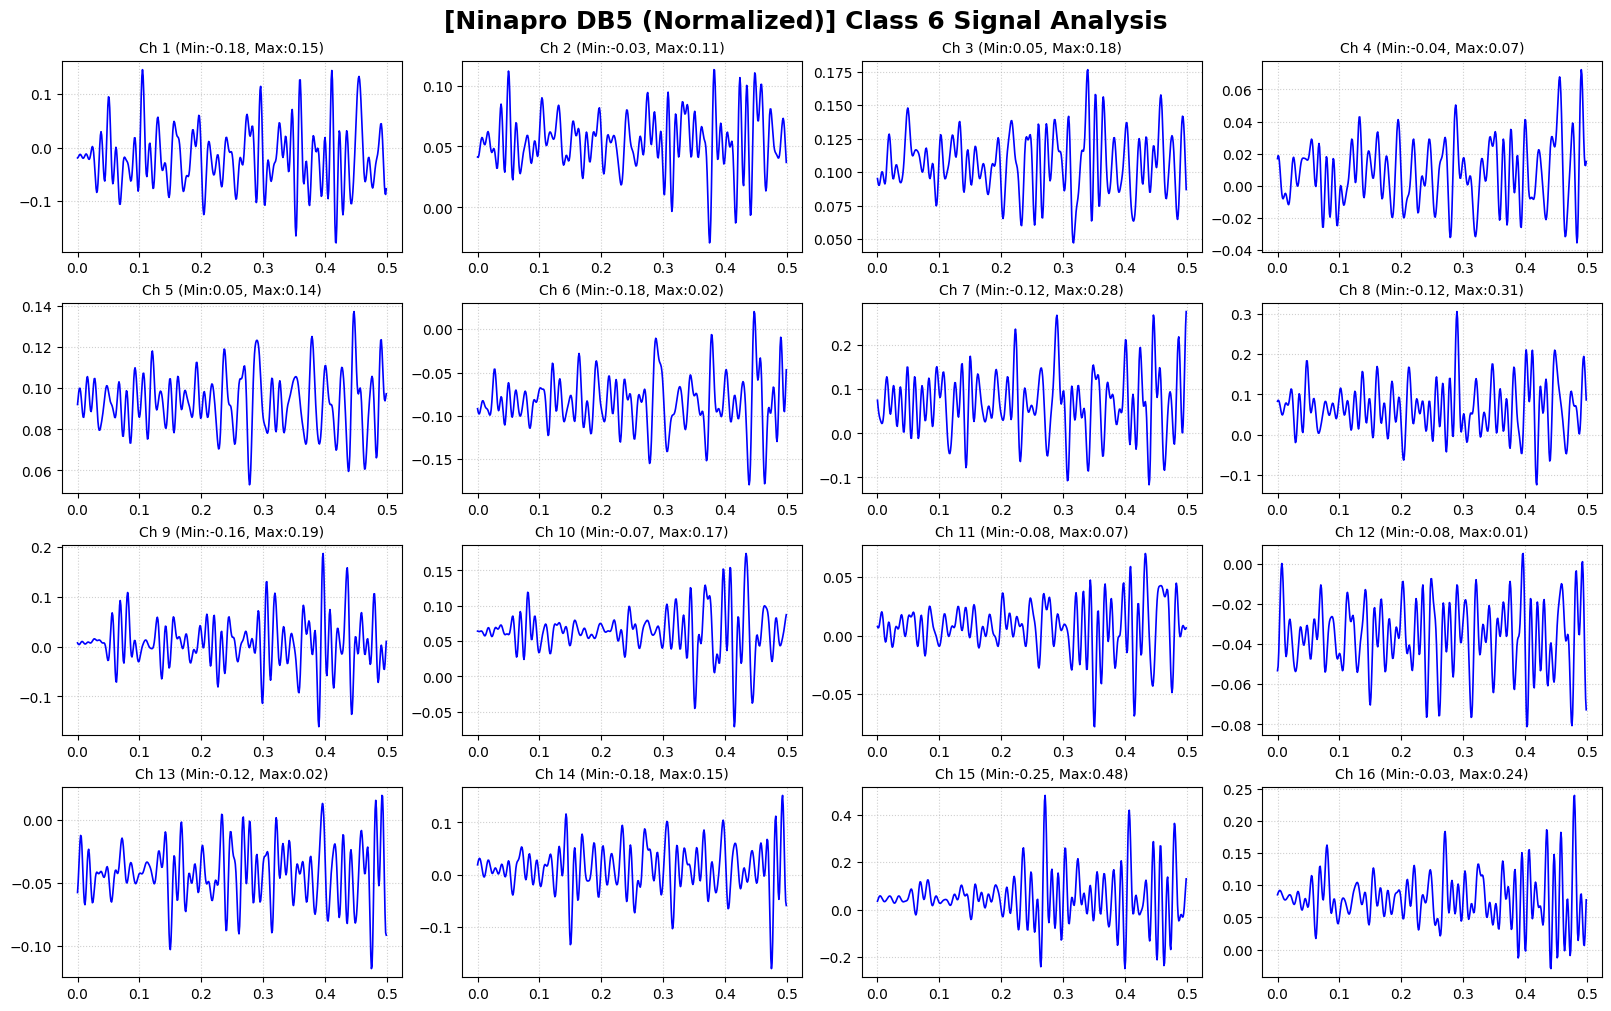

--------------------------------------------------
▶ [Ninapro DB2 (Normalized)] 시각화 생성 중...


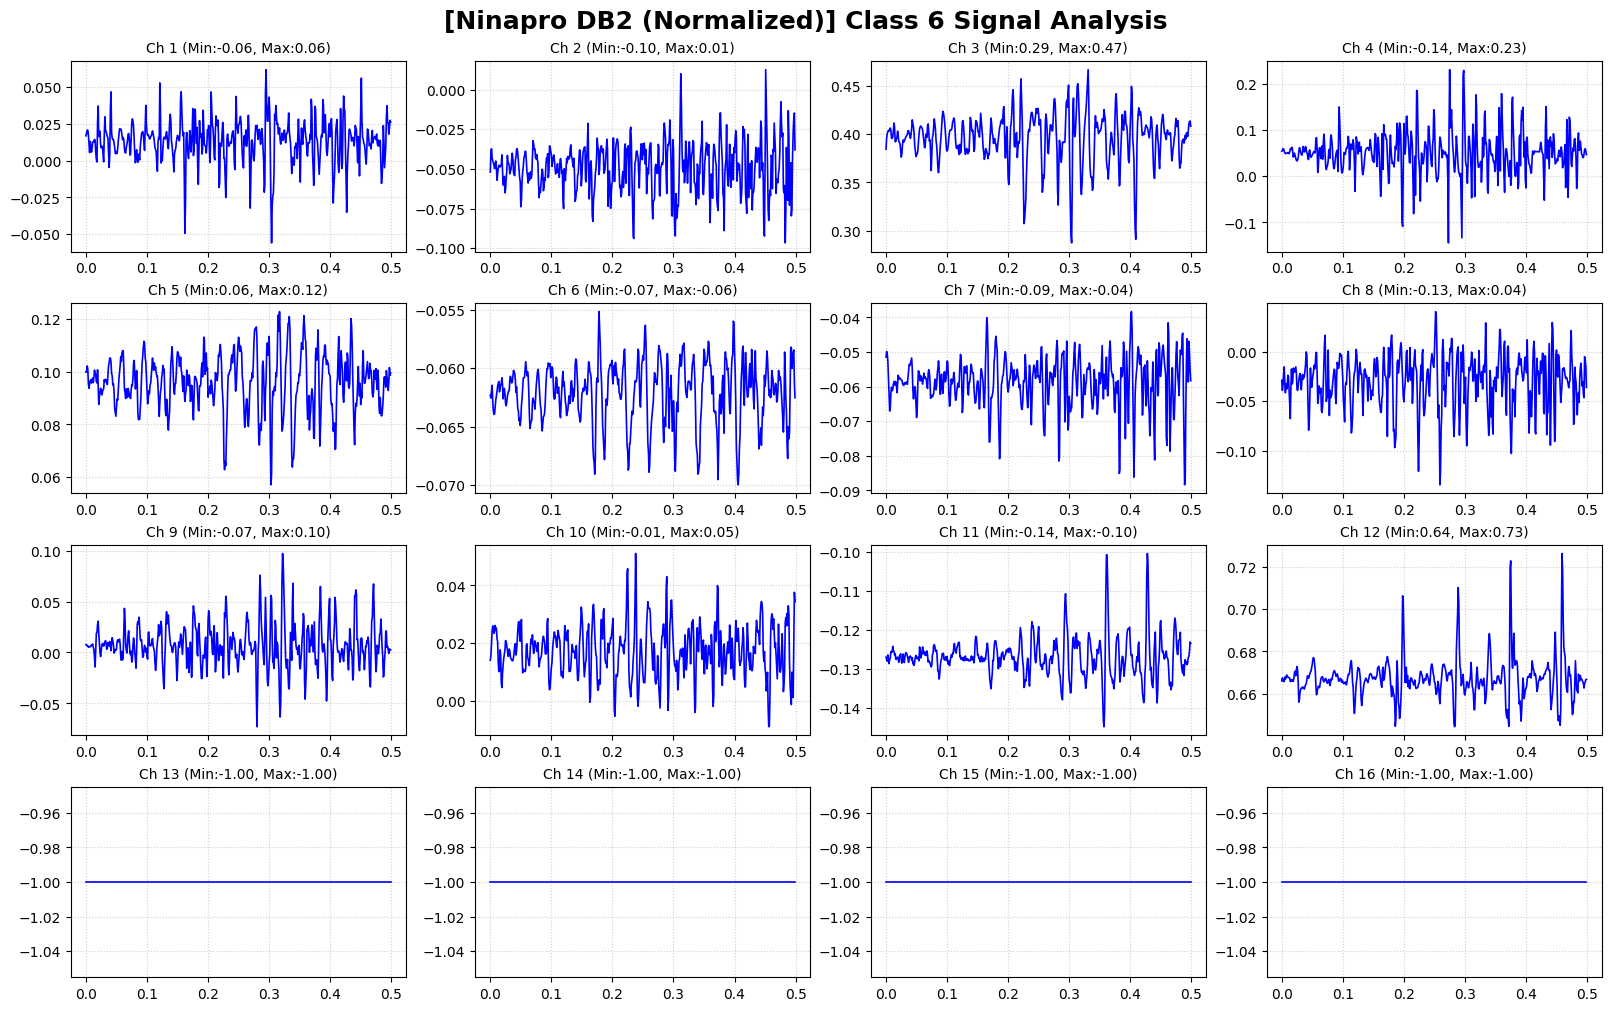

--------------------------------------------------
▶ [Nature DF (Normalized)] 시각화 생성 중...


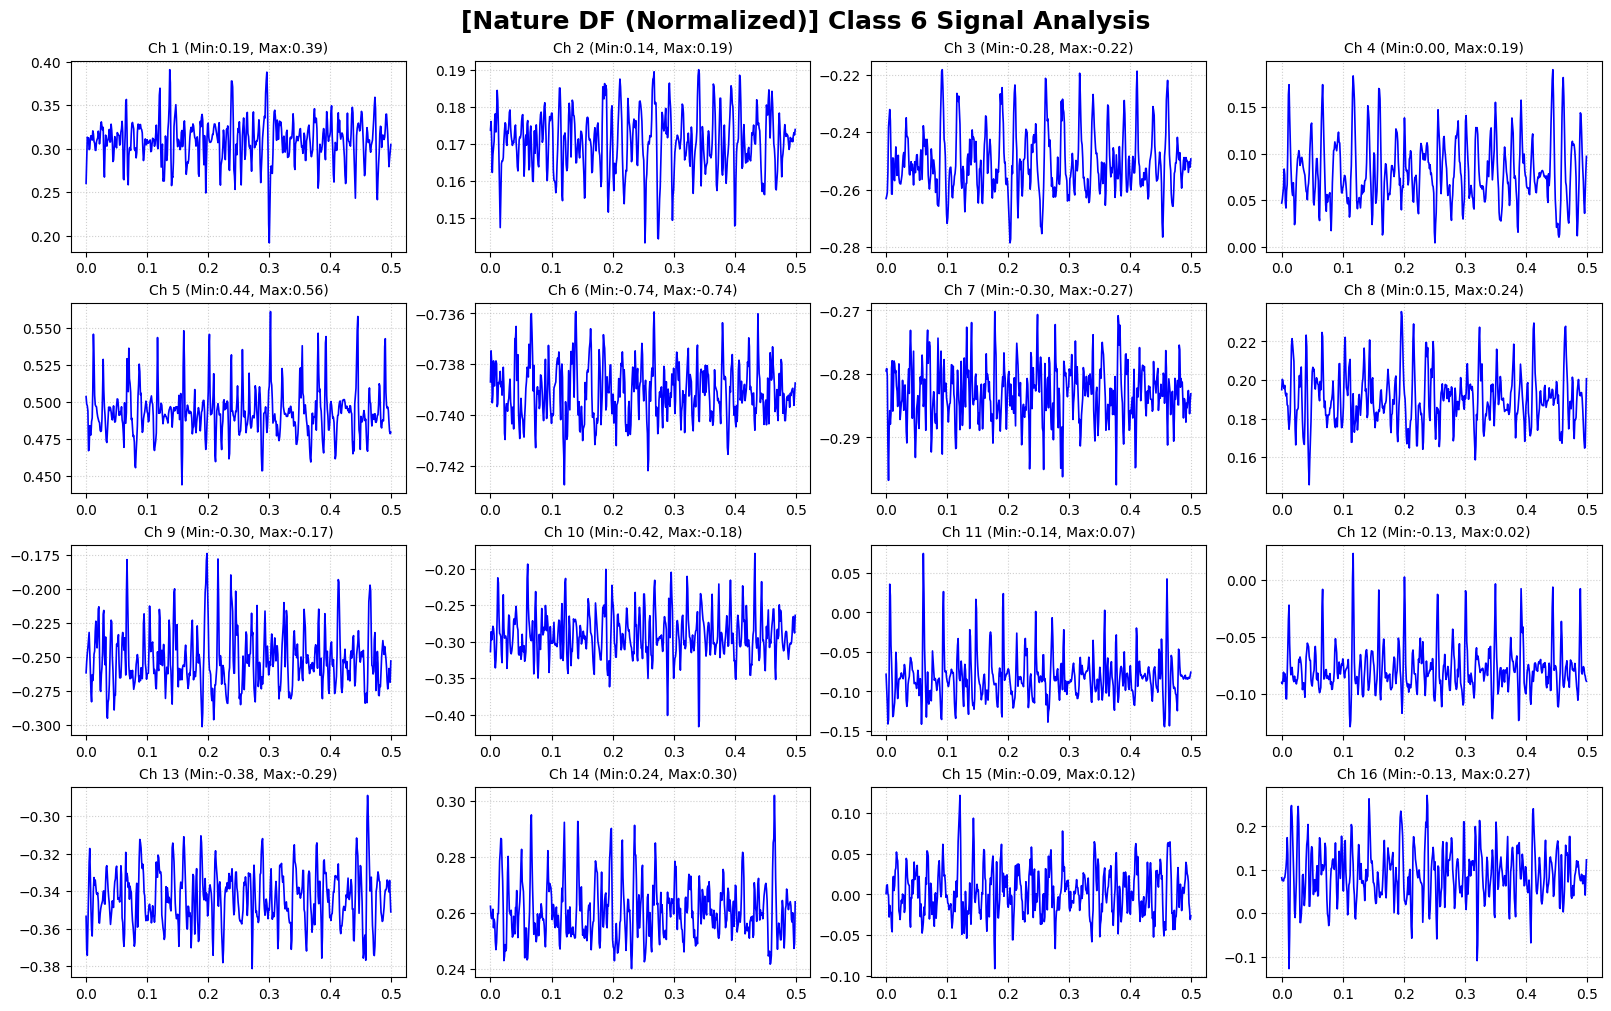

--------------------------------------------------


In [29]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_signals_separately(datasets, target_class=1, duration_sec=0.5, fs=1000):
    """
    각 데이터셋 별로 별도의 Figure를 생성하여 신호를 시각화합니다.
    """
    
    # 딕셔너리에 들어있는 데이터셋 하나씩 순회
    for name, df in datasets.items():
        print(f"▶ [{name}] 시각화 생성 중...")
        
        # 1. 라벨 컬럼 확인
        if 'Restimulus' not in df.columns:
            print(f"   [Error] 'Restimulus' 컬럼이 없습니다. 건너뜁니다.")
            continue
            
        # 2. 해당 클래스 데이터 추출
        class_data = df[df['Restimulus'] == target_class]
        
        if class_data.empty:
            print(f"   [Warning] Class {target_class} 데이터가 없습니다.")
            continue
            
        # 3. 데이터 슬라이싱 (동작 시작 후 0.5초)
        n_samples = int(duration_sec * fs)
        
        # 인덱스를 리셋하여 0부터 시작하게 만듦
        subset = class_data.iloc[:n_samples].reset_index(drop=True)
        time_axis = np.arange(len(subset)) / fs
        
        # 4. 개별 Figure 생성 (4x4 Grid)
        fig, axes = plt.subplots(4, 4, figsize=(16, 10), constrained_layout=True)
        
        # 제목에 데이터셋 이름 표시
        fig.suptitle(f"[{name}] Class {target_class} Signal Analysis", fontsize=18, fontweight='bold')
        
        axes = axes.flatten()
        
        for i in range(16):
            ax = axes[i]
            col_name = f'emg{i+1}'
            
            if col_name in subset.columns:
                signal = subset[col_name].values
                
                # 그래프 그리기
                ax.plot(time_axis, signal, color='blue', linewidth=1.2)
                
                # --- [중요] 정규화 확인용 Y축 고정 ---
                # 정규화가 잘 되었다면 데이터가 -1 ~ 1 사이에 꽉 차야 합니다.
                # 필요하다면 아래 주석을 해제하여 강제로 범위를 고정해보세요.
                # ax.set_ylim(-1.1, 1.1) 
                
                # 현재 데이터의 최대/최소값 표시 (디버깅용)
                y_min, y_max = np.min(signal), np.max(signal)
                ax.set_title(f"Ch {i+1} (Min:{y_min:.2f}, Max:{y_max:.2f})", fontsize=10)
                
            else:
                # 데이터가 없는 채널 (Zero Padding 된 경우 등)
                ax.text(0.5, 0.5, "No Data / Padding", ha='center', va='center', color='gray')
                ax.set_title(f"Ch {i+1}")

            ax.grid(True, linestyle=':', alpha=0.6)
            
        plt.show()
        print("-" * 50)

# ========================================================
# [실행] 정규화된 데이터셋 딕셔너리 준비
# ========================================================

# 앞서 정규화(MinMax)를 수행한 변수들을 넣어주세요
data_dict = {
    "Ninapro DB5 (Normalized)": df5_norm,
    "Ninapro DB2 (Normalized)": df2_norm,
    "Nature DF (Normalized)": df_nature_norm
}

# 함수 실행 (Class 1 확인)
plot_class_signals_separately(data_dict, target_class=6, duration_sec=0.5)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Dense, GlobalAveragePooling1D, Multiply, Add, BatchNormalization, Activation, Dropout, Lambda
from tensorflow.keras.models import Model

def create_expert_network(input_shape, expert_name="expert"):
    """
    각 전문가(Expert)는 독립적인 CNN 시각을 가집니다.
    """
    inputs = Input(shape=input_shape)
    
    # 채널별 특성을 잘 뽑도록 Conv1D 설계
    x = Conv1D(64, 5, padding='same', activation='elu')(inputs)
    x = BatchNormalization()(x)
    x = Conv1D(128, 3, padding='same', activation='elu')(x)
    x = BatchNormalization()(x)
    
    # 전체 시간 평균 (Global Average Pooling)
    x = GlobalAveragePooling1D()(x) 
    
    outputs = Dense(128, activation='elu', name=f"{expert_name}_dense")(x)
    return Model(inputs, outputs, name=expert_name)

def build_location_aware_moe(input_shape, num_classes, num_experts=3):
    
    # --- [Input 1] EMG 신호 (200, 16) ---
    emg_input = Input(shape=input_shape, name="emg_input")
    
    # --- [Input 2] 센서 위치 정보 (One-Hot: 3) ---
    pos_input = Input(shape=(num_experts,), name="pos_input")
    
    expert_outputs = []
    
    # 전문가 3명 생성 (DB2담당, DB5담당, Nature담당)
    for i in range(num_experts):
        # 1. 전문가 네트워크 생성
        expert = create_expert_network(input_shape, expert_name=f"Expert_{i}")
        
        # 2. EMG 신호 처리
        exp_feature = expert(emg_input) # 결과: (Batch, 128)
        
        # 3. Gating (스위치)
        # pos_input에서 자신의 ID에 해당하는 비트만 가져옴 (0 or 1)
        # 예: DB2 데이터(pos=[1,0,0])가 들어오면 Expert_0의 gate는 1, 나머지는 0
        gate = Lambda(lambda x: x[:, i:i+1], name=f"Gate_{i}")(pos_input)
        
        # 4. 신호 통과 여부 결정 (곱하기)
        # Gate가 1이면 신호 통과, 0이면 0으로 차단
        gated_feature = Multiply(name=f"Gated_Expert_{i}")([exp_feature, gate])
        
        expert_outputs.append(gated_feature)
    
    # --- 통합 (Aggregation) ---
    # 선택된 전문가의 신호만 살아남아 합쳐짐
    merged = Add()(expert_outputs)
    
    # --- 최종 분류기 ---
    x = Dropout(0.4)(merged)
    x = Dense(64, activation='elu')(x)
    outputs = Dense(num_classes, activation='softmax', name="classifier")(x)
    
    model = Model(inputs=[emg_input, pos_input], outputs=outputs)
    return model

# =========================================================
# 모델 생성 및 학습 준비
# =========================================================
INPUT_SHAPE = (200, 16) # (Time, Channel)
NUM_CLASSES = 53        # 예시 클래스 수
NUM_EXPERTS = 3         # 데이터셋 종류 수

model = build_location_aware_moe(INPUT_SHAPE, NUM_CLASSES, NUM_EXPERTS)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emg_input           │ (None, 200, 16)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pos_input           │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Expert_0            │ (None, 128)       │     47,168 │ emg_input[0][0]   │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Gate_0 (Lambda)     │ (None, 1)         │          0 │ pos_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Expert_1            │ (None, 128)       │     47,168 │ emg_input[0][0]   │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Gate_1 (Lambda)     │ (None, 1)         │          0 │ pos_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Expert_2            │ (None, 128)       │     47,168 │ emg_input[0][0]   │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Gate_2 (Lambda)     │ (None, 1)         │          0 │ pos_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Gated_Expert_0      │ (None, 128)       │          0 │ Expert_0[0][0],   │
│ (Multiply)          │                   │            │ Gate_0[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Gated_Expert_1      │ (None, 128)       │          0 │ Expert_1[0][0],   │
│ (Multiply)          │                   │            │ Gate_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Gated_Expert_2      │ (None, 128)       │          0 │ Expert_2[0][0],   │
│ (Multiply)          │                   │            │ Gate_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 128)       │          0 │ Gated_Expert_0[0… │
│                     │                   │            │ Gated_Expert_1[0… │
│                     │                   │            │ Gated_Expert_2[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │      8,256 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classifier (Dense)  │ (None, 53)        │      3,445 │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 153,205 (598.46 KB)

 Trainable params: 152,053 (593.96 KB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder

# ========================================================
# 1. 라벨 전처리 (안전장치)
# ========================================================
# 라벨이 0부터 차례대로 있지 않거나(예: 1, 3, 5...), Class 0을 지워서 비어있는 번호가 있을 수 있음
# 이를 0 ~ N-1로 깔끔하게 다시 매핑해줍니다.
le = LabelEncoder()
y_final_mapped = le.fit_transform(y_final)
num_classes = len(np.unique(y_final_mapped))

# One-Hot Encoding
y_onehot = to_categorical(y_final_mapped, num_classes=num_classes)

print(f"라벨 인코딩 완료: 총 {num_classes}개 클래스")

# ========================================================
# 2. 데이터 분리 (Train : Val : Test = 6 : 2 : 2)
# ========================================================
# 입력이 2개(EMG, Pos)이므로, train_test_split에도 같이 넣어줘야 합니다.

# 1차 분리: Train (60%) / Temp (40%)
X_train, X_temp, pos_train, pos_temp, y_train, y_temp = train_test_split(
    X_final, X_pos_encoded, y_onehot, 
    test_size=0.4, random_state=42, stratify=y_onehot
)

# 2차 분리: Val (20%) / Test (20%)
X_val, X_test, pos_val, pos_test, y_val, y_test = train_test_split(
    X_temp, pos_temp, y_temp, 
    test_size=0.5, random_state=42, stratify=y_temp
)

print("-" * 30)
print(f"Train Set : EMG {X_train.shape}, Pos {pos_train.shape}")
print(f"Val Set   : EMG {X_val.shape},   Pos {pos_val.shape}")
print(f"Test Set  : EMG {X_test.shape},  Pos {pos_test.shape}")
print("-" * 30)

# ========================================================
# 3. 모델 컴파일 및 학습 설정
# ========================================================
# (앞서 정의한 build_location_aware_moe 함수가 메모리에 있어야 합니다)
input_shape = (X_train.shape[1], X_train.shape[2]) # (200, 16)
num_experts = 3 # DB2, DB5, Nature

# 모델 생성 (함수가 정의되어 있다고 가정)
model = build_location_aware_moe(input_shape, num_classes, num_experts)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 콜백 설정 (학습 효율화)
callbacks = [
    ModelCheckpoint('best_moe_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
]

# ========================================================
# 4. 학습 실행 (model.fit)
# ========================================================
print("학습 시작...")

history = model.fit(
    x=[X_train, pos_train],       # [입력1(신호), 입력2(위치)] 리스트로 전달!
    y=y_train,
    validation_data=([X_val, pos_val], y_val), # 검증 데이터도 동일한 형태
    epochs=100,                   # 필요시 조절
    batch_size=64,                # 메모리에 따라 조절 (32, 64, 128...)
    callbacks=callbacks,
    verbose=1
)

# ========================================================
# 5. 결과 그래프 그리기
# ========================================================
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(1, len(acc) + 1)
    
    plt.figure(figsize=(14, 5))
    
    # 정확도(Accuracy) 그래프
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, 'r--', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True, linestyle=':', alpha=0.6)
    
    # 손실(Loss) 그래프
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, 'b-', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'r--', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle=':', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

# ========================================================
# 6. 최종 테스트셋 평가
# ========================================================
print("\n[최종 테스트 평가]")
test_loss, test_acc = model.evaluate([X_test, pos_test], y_test)
print(f"Test Accuracy: {test_acc:.4f}")

라벨 인코딩 완료: 총 19개 클래스
------------------------------
Train Set : EMG (355578, 200, 16), Pos (355578, 3)
Val Set   : EMG (118526, 200, 16),   Pos (118526, 3)
Test Set  : EMG (118527, 200, 16),  Pos (118527, 3)
------------------------------
학습 시작...
Epoch 1/100
5555/5556 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2579 - loss: 1.9030
Epoch 1: val_accuracy improved from None to 0.41824, saving model to best_moe_model.keras
5556/5556 ━━━━━━━━━━━━━━━━━━━━ 222s 39ms/step - accuracy: 0.3574 - loss: 1.7123 - val_accuracy: 0.4182 - val_loss: 1.5909 - learning_rate: 0.0010
Epoch 2/100
5555/5556 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5454 - loss: 1.3302
Epoch 2: val_accuracy improved from 0.41824 to 0.50596, saving model to best_moe_model.keras
5556/5556 ━━━━━━━━━━━━━━━━━━━━ 222s 40ms/step - accuracy: 0.5695 - loss: 1.2739 - val_accuracy: 0.5060 - val_loss: 1.4950 - learning_rate: 0.0010
Epoch 3/100
5555/5556 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6102 - loss: 1.1737
Epoch 3